שם התלמיד

.......................

# Google Colab notebook for teaching and practicing Keras for a classification problem

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# **1. Import Data**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **2. Data Preparation**

## **2.1 Normalization**
**Normalization** is a crucial preprocessing step in the pipeline of data preparation for machine learning models, especially neural networks. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values or losing information.

The mathematical equation used by StandardScaler to calculate X_scaled from X involves standardizing each feature (column) of the dataset. The standardized value Z for each data point x in a feature column is calculated using the formula:

$Z = (x-μ) /σ $,

where

*   $x$ is the original value of the data point.
*   $μ$ is the mean of the feature column.
*   $σ$ is the standard deviation of the feature column.

This transformation is known as z-score normalization or standardization.
The result is a dataset where each feature column has been scaled in such a way that it has a mean of 0 and a standard deviation of 1, making the data more suitable for many machine learning algorithms, particularly those involving gradient descent optimization or algorithms sensitive to the scale of input features, like neural networks.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **2.2 Division into Training/Validation/Test Set**


Splitting the dataset into three parts—training, validation, and test sets—is a standard practice in machine learning to evaluate the performance of a model effectively. This approach helps in minimizing overfitting, tuning the model's hyperparameters, and providing an unbiased evaluation of its final performance. Let's dive deeper into the rationale behind this practice and explain the code section provided for splitting the data.

**Goal of Splitting the Data**

1.   Training Set: This is the largest portion of the data, used to train the model. The model learns to recognize patterns and features from this dataset.

2.   Validation Set: The validation set is used to fine-tune the model's parameters and make decisions about which models perform best. It acts as a proxy for the test set during the development phase, allowing you to evaluate the model without using the test set, which should only be used at the very end of your experiment to provide an unbiased evaluation.
3.   Test Set: This set is used to provide an unbiased evaluation of the final model fit on the training dataset. It's only used once a model is completely trained (using the training and validation sets). The test set evaluation gives you the performance metric that is expected from the model on unseen data.

In [ ]:
# splits the scaled feature matrix X_scaled and the target variable y into a training set and a temporary set (X_temp, y_temp).
# train - 70%, temp - 30%
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# takes the temporary set and splits it equally into validation and test sets
# train - 70%, val 15%, test 15%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **3. Creating a Network for Classification**

In part 3, we focus on building a neural network model using Keras. The keras.Sequential function is a central feature of Keras, allowing for the creation of models layer-by-layer in a step-by-step fashion. Let's delve into the details of keras.Sequential and the code snippet provided for constructing a classification network.

Keras Sequential Model
The Sequential model in Keras is a linear stack of layers. It's the simplest kind of Keras model for neural networks that are just composed of a stack of layers, where each layer has exactly one input tensor and one output tensor. The Sequential model is a great starting point for many deep learning tasks because of its simplicity and ease of use.

 Dense layers are the most common and basic form of layers in neural networks, where each neuron receives input from all neurons of the previous layer, hence "fully connected".

In [ ]:
# input layer input_shape=(4,)
# first hidden layer is the input layer (64 neurons), activation function: ReLU (Rectified Linear Unit)
# second hidden layer is the hidden layer (64 neurons), activation function: ReLU (Rectified Linear Unit)
# output layer (3 neurons, classification problem with three classes), activation function: softmax (good for multi-class classification problem)
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# **4. Training the Network with Sample Data**

In part 4, the focus is on training the neural network model built with Keras. This process involves feeding the training data into the model and adjusting the model parameters (weights and biases) to minimize a loss function. The model.fit() method is used for this purpose. Let's break down the code used for training and understand the output of the first epoch.

## **4.1 model.compile:**

This prepares the model for training.

1. optimizer='adam': Specifies the optimization algorithm to use. Adam is a popular choice because it combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). It is known for being effective and efficient in practice.
2. loss='sparse_categorical_crossentropy': Sets the loss function. For multi-class classification problems where labels are integers, sparse_categorical_crossentropy is appropriate. It measures the difference between the predicted probabilities and the actual class distribution, aiming to minimize this difference.
3. metrics=['accuracy']: Tells the model to track accuracy during training. Accuracy is the fraction of correctly classified instances among all instances.

## **4.2 model.fit:**

Starts the training process.

X_train, y_train: The training data (features and labels) to fit the model.
epochs=20: Specifies the number of times to iterate over the entire dataset. An epoch is one complete pass through the training dataset.
validation_data=(X_val, y_val): Provides the validation dataset. The model will not train on this data; instead, it evaluates its loss and any model metrics at the end of each epoch, which helps monitor the model's performance and tune hyperparameters without using the test set.

## **4.3 Understanding the Output**
When you start training, Keras prints out the progress for each epoch. Here's what the output for the first epoch means:

- Epoch 1/20: Indicates the current epoch (1st) out of the total number of epochs (20).

- 4/4 [==============================]: Shows the number of batches processed. Keras divides the data into batches, and here it indicates that all 4 batches have been processed. The progress bar [==============================] visually represents this completion.

- 4s 209ms/step: The training time taken. It took a total of 4 seconds to complete the epoch, averaging 209 milliseconds per step (batch).

- loss: 1.1931: The average loss on the training set over all batches. A loss of 1.1931 means the model's predictions are, on average, somewhat far from the true class labels, considering the nature of the sparse_categorical_crossentropy loss.

- accuracy: 0.3714: The accuracy of the model on the training set. An accuracy of 0.3714 (or 37.14%) means that the model correctly predicted the class of approximately 37% of the training data.

- val_loss: 1.2169: The loss on the validation set. Similar to the training loss, this indicates the average difference between predicted probabilities and actual class labels in the validation data.

- val_accuracy: 0.0909: The accuracy on the validation set, which is notably low at about 9%. This suggests that the model's ability to generalize from the training data to unseen data in the validation set is initially poor.

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
4/4 [==============================] - 3s 152ms/step - loss: 1.0117 - accuracy: 0.3524 - val_loss: 0.9524 - val_accuracy: 0.2727
Epoch 2/20
4/4 [==============================] - 0s 26ms/step - loss: 0.9210 - accuracy: 0.4571 - val_loss: 0.8604 - val_accuracy: 0.7727
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 0.8446 - accuracy: 0.7524 - val_loss: 0.7749 - val_accuracy: 0.9091
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 0.7766 - accuracy: 0.8095 - val_loss: 0.6907 - val_accuracy: 0.9091
Epoch 5/20
4/4 [==============================] - 0s 29ms/step - loss: 0.7097 - accuracy: 0.8286 - val_loss: 0.6171 - val_accuracy: 0.9545
Epoch 6/20
4/4 [==============================] - 0s 39ms/step - loss: 0.6516 - accuracy: 0.8286 - val_loss: 0.5496 - val_accuracy: 0.9545
Epoch 7/20
4/4 [==============================] - 0s 26ms/step - loss: 0.6006 - accuracy: 0.8381 - val_loss: 0.4864 - val_accuracy: 0.9545
Epoch 8/20
4/4 [==========

In Keras, the model parameters (weights and biases) are stored within the layers of the model. After training your model with `.fit()`, the learned weights and biases are stored in the model's layers and can be accessed or manipulated if needed.

For each layer in a Keras model, there are two main sets of parameters:

- **Weights (w)**: These are the parameters that the model learns during training and are used to make predictions. They represent the strength of the connection between units in layers.

- **Biases (b)**: These are also learned during training and are used to shift the activation function to the left or right, which helps the model make better predictions.

In [ ]:
i=0
for layer in model1.layers:
    i=i+1
    weights, biases = layer.get_weights()
    print("w", str(i), weights.shape, ";b", str(i), biases.shape)


w 1 (4, 64) ;b 1 (64,)
w 2 (64, 64) ;b 2 (64,)
w 3 (64, 3) ;b 3 (3,)


The history object returned by the model.fit() method in Keras contains a record of training and validation metrics collected at the end of each epoch throughout the training process. This data is useful for analyzing the model's performance over time, such as to visualize the learning curves for loss and accuracy, and to identify issues like overfitting or underfitting.

Here's what the history object typically contains:

**Main Components of history Object:**
- history.history: This is a dictionary containing metric values recorded during training and validation. The keys in this dictionary are the names of the metrics being monitored, plus the prefix val_ for metrics computed on the validation set. For example, if you are tracking accuracy as a metric, the dictionary will include accuracy for training accuracy over each epoch and val_accuracy for validation accuracy over each epoch. Similarly, it will contain entries for loss (training loss) and val_loss (validation loss).

**Common Uses of the history Object:**

- Plotting Learning Curves:

You can plot the training and validation accuracy over epochs to see how the model improves over time and how well it generalizes to unseen data.
Similarly, plotting the training and validation loss can help identify if and when the model begins to overfit the training data.

- Analyzing Model Performance:

By examining the changes in training and validation metrics, you can make informed decisions about model adjustments, such as whether to increase or decrease the complexity of the model, when to stop training, or how to adjust learning rates.

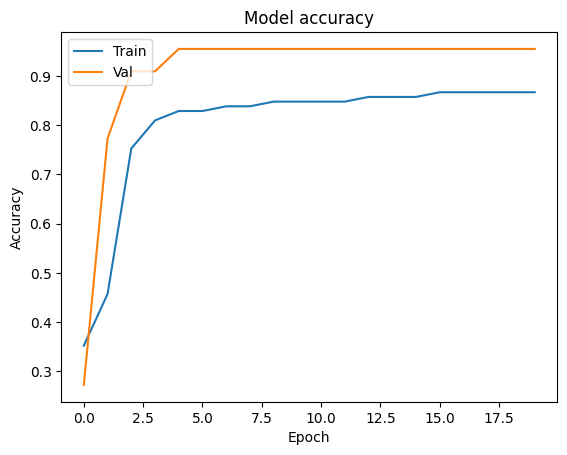

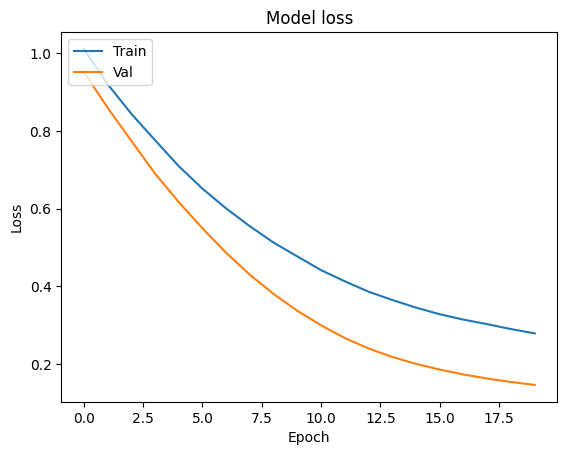

In [ ]:
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


# **5. Performance Evaluation on the Test Set**

In part 6, the focus is on evaluating the performance of the trained neural network model on a test dataset that the model has never seen during the training process. This step is critical as it gives us an unbiased estimate of how well the model is likely to perform on unseen data in real-world scenarios. The model.evaluate() function in Keras is used for this purpose.

- model.evaluate(): This method evaluates the model's performance, typically using the loss function specified during the model.compile() step, and any additional metrics that were also specified. It returns the loss value and metrics values for the model in test mode.

- X_test, y_test: These are the features and labels of the test dataset, respectively. The model has not seen this data during the training phase.

- test_loss: This is the value of the loss function for the test data. It represents how well the model is doing in terms of the loss function chosen (e.g., categorical cross-entropy for classification). A lower loss indicates better performance.

- test_acc: This is the accuracy of the model on the test data. It is the percentage of correct predictions out of all predictions made on the test set. Higher accuracy indicates better performance.

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}, Test Loss: {test_loss}')

1/1 [==============================] - 0s 51ms/step - loss: 0.3707 - accuracy: 0.7826
Test Accuracy: 0.782608687877655, Test Loss: 0.3706608712673187


# Plot interpretation in terms of overfitting or underfitting:

**Overfitting:** This occurs when the model performs well on the training data but poorly on unseen data (validation/test data). You would typically see the training loss continuing to decrease while the validation loss starts to increase after a certain point, indicating that the model is memorizing the training data rather than learning to generalize.

**Underfitting:** This is when the model is too simple to capture the underlying pattern of the data and hence performs poorly even on the training data. Both training and validation losses would be high or decrease very slowly with epochs.

The training loss is consistently decreasing, which is good as it indicates that the model is learning and improving its performance on the training data.

The validation loss also decreases alongside the training loss, which is a positive sign that the model is generalizing well to unseen data.

The test loss (represented as a red dot) appears to be higher than the validation loss at the last epoch but still within a reasonable range. This suggests that the model is performing comparably on the test set as it did during validation.

Add test loss and accuracy in the plots alongside training and validation metrics

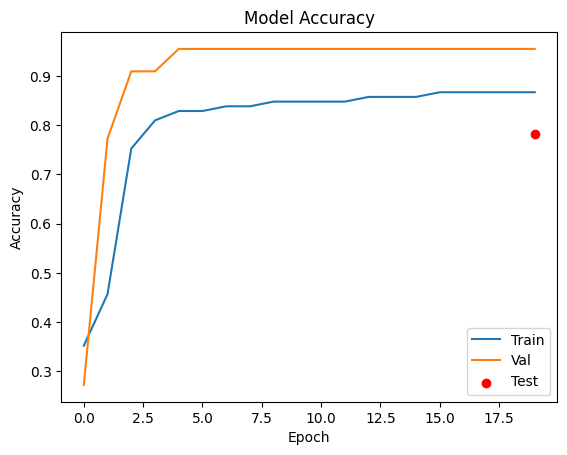

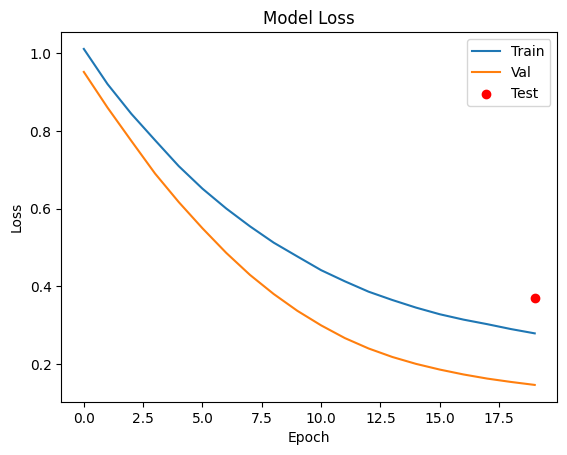

In [ ]:
# Plot training & validation & test accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.scatter(len(history1.history['accuracy']) - 1, test_acc, label='Test', color='red') # Annotate test accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val', 'Test'], loc='lower right')
plt.show()

# Plot training & validation & test loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.scatter(len(history1.history['loss']) - 1, test_loss, label='Test', color='red') # Annotate test loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val', 'Test'], loc='upper right')
plt.show()

# **6. Implement Confusion Matrix**


In part 7, the focus is on understanding the model's predictive performance through a confusion matrix after the model has been trained and evaluated on the test set.

**Confusion Matrix**
A confusion matrix is a table often used to describe the performance of a classification model on a set of data for which the true values are known. It allows you to visualize the performance of an algorithm:

* True Positives (TP): Correctly predicted positive observations
* True Negatives (TN): Correctly predicted negative observations
* False Positives (FP): Incorrectly predicted positive observations (Type I error)
* False Negatives (FN): Incorrectly predicted negative observations (Type II error)

For a multi-class classification problem, the matrix provides these counts for each class. This allows you to see if the model is confusing two classes (i.e., commonly mislabeling one as another).

y_pred = np.argmax(model.predict(X_test), axis=1)

- model.predict(X_test): This generates the output predictions for the input samples from the test set.

- np.argmax(..., axis=1): Since the predictions are given as probabilities for each class, np.argmax takes the argument of the maximum along axis 1 (across each row), which corresponds to the class with the highest predicted probability. This converts the probabilities to actual class predictions.

conf_matrix = confusion_matrix(y_test, y_pred)

- confusion_matrix(y_test, y_pred): This function computes the confusion matrix using the true labels y_test and the predicted labels y_pred.
- conf_matrix: This is the resulting confusion matrix, where each row represents the true classes, and each column represents the predicted classes.

The output conf_matrix is a matrix where the element at the $i$th row and
$j$th column represents the number of samples with the true label being the
$i$th class and the predicted label being the $j$th class.

For a perfect classifier, the confusion matrix would have non-zero values only on the diagonal (where the true class equals the predicted class), with zeros on the off-diagonal.

In [ ]:
y_pred = np.argmax(model1.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

1/1 [==============================] - 0s 230ms/step
[[6 0 0]
 [0 5 5]
 [0 0 7]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred = y_pred);

This is the confusion matrix for a 3-class classification problem. Each row of the matrix corresponds to the true classes, while each column represents the predicted classes. Here's how to read it:

First row: [6 0 0] means that there were 6 instances of the first class, and all of them were correctly classified by the model (true positives for the first class), with no instances misclassified as belonging to the second or third class.

Second row: [0 5 5] indicates that there were 10 instances of the second class. The model correctly classified 5 of them as the second class (true positives for the second class), but it incorrectly classified the other 5 instances as the third class (false negatives for the second class and false positives for the third class).

Third row: [0 0 7] shows that there were 7 instances of the third class, and the model correctly classified all of them (true positives for the third class).

In [ ]:
#Precision for type 0
TP_0 = conf_matrix[0,0]
TN_0 = conf_matrix[1,1] + conf_matrix[2,2] + conf_matrix[1,2] + conf_matrix[2,1]
FP_0 = conf_matrix[1,0] + conf_matrix[2,0]
FN_0 = conf_matrix[0,1] + conf_matrix[0,2]
print("precision=",TP_0/(TP_0+FP_0))

# **7. calculate the F1 score**

calculate the F1 score using the precision and recall metrics provided by Keras.

calculate the F1 score manually using Keras:

1. Evaluate the precision and recall using the relevant Keras metrics.

2. Use the precision and recall to calculate the F1 score with the formula:

$F1=2×(precision×recall) / (precision+recall)$

Here's a sample code snippet that demonstrates this calculation:

In [ ]:
#Calculate Precision, Recall, F1 Score for each category
Precision = np.zeros(3)
Recall = np.zeros(3)
F1_Score = np.zeros(3)

# YOUR CODE HERE - START


# YOUR CODE HERE - END

print('Precision: ', Precision)
print('Recall: ', Recall)
print('F1 Score: ', F1_Score)

Precision:  [0. 0. 0.]
Recall:  [0. 0. 0.]
F1 Score:  [0. 0. 0.]


In [ ]:
#Check your calulation with this code:
from sklearn import metrics, model_selection
print(metrics.classification_report(y_test, y_pred,labels=[0,1,2]))

# **8. Improving the Model**

Here are some strategies that might help improve your model's performance:

1. **Data Quality**:
   - **More Data**: Sometimes, the model needs more examples to learn from. Consider augmenting your dataset if possible.
   - **Balanced Classes**: Ensure that your dataset does not have class imbalance. If it does, consider techniques like oversampling the minority class or undersampling the majority class.
   - **Feature Engineering**: Create new features or transform existing ones to better capture the patterns in the data.

2. **Model Complexity**:
   - **Add Layers or Neurons**: If the model is too simple to capture the complexity of the data, adding more layers or increasing the number of neurons can help.
   - **Regularization**: Apply regularization techniques like dropout or L1/L2 regularization to prevent overfitting.

3. **Hyperparameter Tuning**:
   - **Learning Rate**: Adjust the learning rate. Sometimes a lower learning rate can yield better results, although it may take longer to converge.
   - **Optimizer**: Try different optimizers like SGD, Adam, RMSprop, and see if they improve the results.
   - **Batch Size**: Experiment with different batch sizes. Smaller batches can provide a regularizing effect and higher generalization performance.

4. **Training Process**:
   - **Epochs**: Train for more epochs, but be mindful of overfitting.
   - **Early Stopping**: Use early stopping to halt the training when the validation score starts to deteriorate.

5. **Evaluation Method**:
   - **Cross-Validation**: Instead of a single train/test split, use k-fold cross-validation to ensure the results are consistent across different subsets of the data.

6. **Model Architecture**:
   - **Different Architectures**: Try different neural network architectures to find one that works better for your specific problem.
   - **Activation Functions**: Experiment with different activation functions (e.g., ELU, Leaky ReLU) that may help with the learning process.

7. **Loss Function**:
   - If you're dealing with a highly imbalanced dataset, consider using a different loss function that can take into account the class imbalance.

8. **Data Preprocessing**:
   - **Normalization/Standardization**: Make sure the data is properly normalized or standardized.
   - **Data Augmentation**: For image, text, or audio data, use augmentation techniques to increase the diversity of your training data.

It's important to remember that improving model performance is often an iterative process. You might need to try several of these strategies to see what works best for your specific problem. Keep track of the changes you make and evaluate the model after each significant modification to understand its impact on performance.

# **9. Exercise 1 - Early Stopping**

Early stopping is a form of regularization used to avoid overfitting when training a machine learning model. It works by monitoring the model's performance on a validation set and stopping the training process if the performance on the validation set starts to degrade, such as when the validation loss begins to increase.

Here's how you can implement early stopping in Keras:

```python
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,  # Number of epochs with no improvement after which training will be stopped
                               verbose=1,  # Log level
                               mode='min',  # The training will stop when the quantity monitored has stopped decreasing
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Include the callback in the model's fit method
history = model.fit(X_train, y_train,
                    epochs=100,  # Set a high epoch number, early stopping will halt the training before reaching it
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])  # Include the early stopping callback here
```

In this example:
- `monitor='val_loss'` tells Keras to monitor the validation loss for changes. If you are more focused on accuracy or another metric, you can change this to `monitor='val_accuracy'` or any other metric you are tracking.
- `patience=10` specifies the number of epochs with no improvement after which training will be stopped. Adjusting this number allows you to wait longer or shorter periods before stopping the training. A higher number means waiting longer before stopping, which can be useful if your model's performance tends to fluctuate over epochs.
- `verbose=1` will print messages about early stopping actions.
- `mode='min'` means that training will stop when the quantity monitored has stopped decreasing; for metrics like accuracy, you would use `mode='max'`, because higher is better.
- `restore_best_weights=True` ensures that once the training is stopped, the model's weights are reverted to the ones from the epoch with the best value of the monitored quantity. This means you end up with the model in its most optimal state.

This setup provides a simple and effective way to prevent overfitting by halting the training process at an optimal point.

## **9.1 Run your model again, this time use EarlyStopping method:**

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# YOUR CODE HERE


# import

# Define early stopping callback




# Include the callback in the model's fit method






Epoch 1/100
4/4 [==============================] - 2s 123ms/step - loss: 1.1489 - accuracy: 0.2381 - val_loss: 1.0390 - val_accuracy: 0.4091
Epoch 2/100
4/4 [==============================] - 0s 34ms/step - loss: 1.0225 - accuracy: 0.4476 - val_loss: 0.8791 - val_accuracy: 0.8182
Epoch 3/100
4/4 [==============================] - 0s 49ms/step - loss: 0.9147 - accuracy: 0.6190 - val_loss: 0.7558 - val_accuracy: 0.8636
Epoch 4/100
4/4 [==============================] - 0s 31ms/step - loss: 0.8277 - accuracy: 0.6476 - val_loss: 0.6508 - val_accuracy: 0.8636
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.7547 - accuracy: 0.6476 - val_loss: 0.5662 - val_accuracy: 0.8636
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6883 - accuracy: 0.6667 - val_loss: 0.4991 - val_accuracy: 0.8636
Epoch 7/100
4/4 [==============================] - 0s 43ms/step - loss: 0.6352 - accuracy: 0.7333 - val_loss: 0.4410 - val_accuracy: 0.8636
Epoch 8/100
4/4 [==

## **9.2 Plot training & validation loss values**

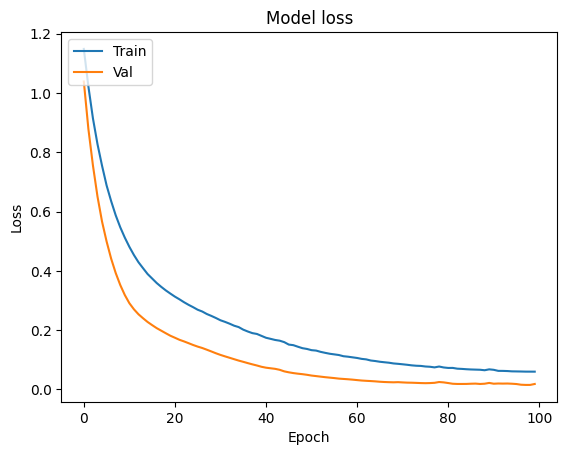

In [ ]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## **9.3 Analyze the last 10 iterations**

1. **Convergence of Training and Validation Loss**: Both losses converge to similar values towards the end of the training process, which typically indicates a well-fitting model. There is no clear divergence, which would be a sign of overfitting, nor is the validation loss higher than the training loss by a significant margin, which would indicate underfiting.

2. **Stability in the Last Epochs**: The losses are stable and low in the last epochs, suggesting that additional training beyond this point may not lead to substantial improvements without further adjustments or more data.

To analyze the last 10 iterations, you would generally want to look at the specific values of the loss for validation sets from your `history` object in Keras.

Plot just the last 10 epochs from your training history, you need to slice the loss history accordingly. Assuming you have the `history` object from Keras, here's how you could show the last 10 epochs:

`history.history['loss'][-10:]`

`history.history['val_loss'][-10:]`



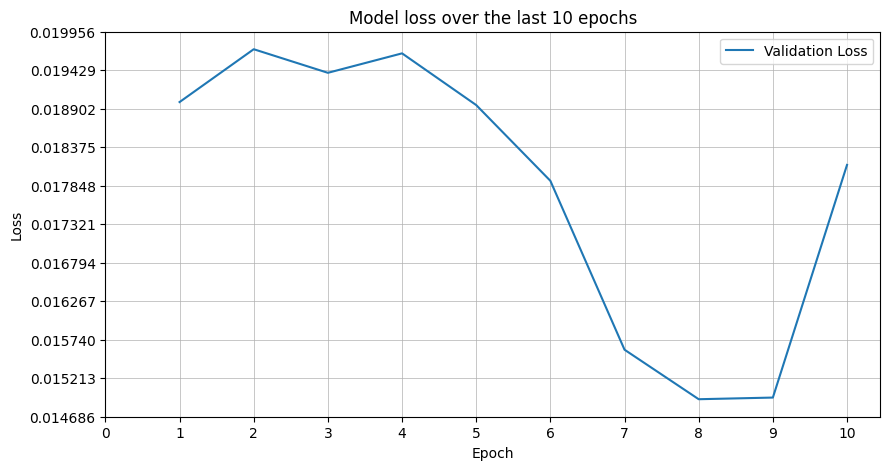

In [ ]:
# 'history2.history["loss"]' are list containing the loss values

# Plot the last 10 epochs for training loss
plt.figure(figsize=(10, 5))
plt.plot([1,2,3,4,5,6,7,8,9,10],history2.history['val_loss'][-10:], label='Validation Loss')
plt.title('Model loss over the last 10 epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(linestyle='-', linewidth='0.5')
plt.xticks(ticks=np.arange(0, 11, 1))  # X-axis ticks from 0 to 10 with a step of 1
plt.yticks(ticks=np.linspace(plt.ylim()[0], plt.ylim()[1], 11))  # Y-axis ticks spaced evenly for the 10x10 grid

plt.show()


## **9.4 Calcule again f1_score, precision & recall**

In [ ]:
# YOUR CODE HERE
# Calculate conf_matrix

# Print conf_matrix
print(conf_matrix)

1/1 [==============================] - 0s 60ms/step
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]


In [ ]:
# YOUR CODE HERE
# Calculate precision,recallf1_score

# Print precision,recallf1_score

print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)

Precision:  1.0
Recall:  1.0
F1 Score:  1.0


By: Merav Varsano for M'aala (Davidson Ins.) ©